<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/12_tf_obj_1/Train_Infer_Optimize_Deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation (With deployment to Jetson Nano) 

 - REQUIRES CUDA 10.0 and CUDNN 7


### Note: Not tested on google colab. 
  - To deploy on jetson nano the development engine needs TF 1.15.2 with TensorRT 6.0.1. 
  - Precompiled TF 1.15.0 support TensorRT 5.1.5. Hence rebuilding tf is required. 


 - Clone Monk Object Detection Library and install the base
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/12_tf_obj_1/installation
     
     - chmod +x install_cuda10_tensorrt6_part1.sh && ./install_cuda10_tensorrt6_part1.sh
     
  
  - Install TensorRT
  
     - This requires TensorRT 6.0.1 to be installed
     
     - Go to https://developer.nvidia.com/tensorrt
     
     - Download 
         - nv-tensorrt-repo-ubuntu1804-cuda10.0-trt6.0.1.5-ga-20190913_1-1_amd64.deb (For Ubuntu18.04)
         - nv-tensorrt-repo-ubuntu1604-cuda10.0-trt6.0.1.5-ga-20190913_1-1_amd64.deb (For Ubuntu16.04)
     
     - Run the following commands to install trt (in a terminal)
     
         - sudo dpkg -i nv-tensorrt-repo-ubuntu1804-cuda10.0-trt6.0.1.5-ga-20190913_1-1_amd64.deb
         - sudo apt-key add "key value will be mentioned as the output of previous command"
         - sudo apt-get update
         - sudo apt-get install tensorrt
         - sudo apt-get install uff-converter-tf
         - sudo apt-get install python3-libnvinfer-dev
  
  
  
  - Install bazel version 0.26.1
  
     - Download bazel deb package from https://github.com/bazelbuild/bazel/releases/tag/0.26.1
     
     - sudo dpkg -i bazel_0.26.1-linux-x86_64.deb
     
     
  - Clone Tensorflow and switch to tensorflow 1.15.2
  
     - git clone https://github.com/tensorflow/tensorflow.git
     
     - cd tensorflow
     
     - git checkout v1.15.2
    
    
  - Configure tensorflow
  
      - ./configure
      
          - Do you wish to build TensorFlow with XLA JIT support? [Y/n]: Y

          - Do you wish to build TensorFlow with OpenCL SYCL support? [y/N]: N

          - Do you wish to build TensorFlow with ROCm support? [y/N]: N

          - Do you wish to build TensorFlow with CUDA support? [y/N]: Y

          - Do you wish to build TensorFlow with TensorRT support? [y/N]: Y
      
          - And press enter (set default) for all other config questions asked by the setup
      
      
  - Build tensorflow using bazel
  
      - bazel build --config=opt --config=cuda //tensorflow/tools/pip_package:build_pip_package
      
      
  - Once built create a wheel file for python installation and run pip installer
  
      - bazel-bin/tensorflow/tools/pip_package/build_pip_package tensorflow_pkg
      
      - cd tensorflow_pkg && pip install tensorflow*.whl
      
  
  - Compile Object Detection API v1
  
     - cd Monk_Object_Detection/12_tf_obj_1/installation
     
     - chmod +x install_cuda10_tensorrt6_part2.sh && ./install_cuda10_tensorrt6_part2.sh
     
### Installation process complete

# Installation (Without deployment to Jetson Nano) 

 - REQUIRES CUDA 10.0 and CUDNN 7


### Note: Tested on google colab. 
  - To deploy on jetson nano the development engine needs TF 1.15.2 with TensorRT 6.0.1. 
  - Precompiled TF 1.15.0 support TensorRT 5.1.5. Hence rebuilding tf is required to port on jetson nano.
  - TensorRT may or maynot work on google colab

  - Run the following commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/12_tf_obj_1/installation
     
     - chmod +x install_cuda10.sh && ./install_cuda10.sh
     
  
  - Install TensorRT (Might not be possible on colab)
  
     - This requires TensorRT 5.1.5 to be installed
     
     - Go to https://developer.nvidia.com/tensorrt
     
     - Download 
         - nv-tensorrt-repo-ubuntu1804-cuda10.0-trt5.1.5.0-ga-20190427_1-1_amd64.deb (For Ubuntu18.04)
         - nv-tensorrt-repo-ubuntu1604-cuda10.0-trt5.1.5.0-ga-20190427_1-1_amd64.deb (For Ubuntu16.04)
     
     - Run the following commands to install trt (in a terminal)
     
         - sudo dpkg -i nv-tensorrt-repo-ubuntu1804-cuda10.0-trt5.1.5.0-ga-20190427_1-1_amd64.deb
         - sudo apt-key add "key value will be mentioned as the output of previous command"
         - sudo apt-get update
         - sudo apt-get install tensorrt
         - sudo apt-get install uff-converter-tf
         - sudo apt-get install python3-libnvinfer-dev
  
    
### Installation process complete

# Installation (Without deployment to Jetson Nano)  (Only for colab)

 - REQUIRES CUDA 10.0 and CUDNN 7


### Note: Tested on google colab. 
  - To deploy on jetson nano the development engine needs TF 1.15.2 with TensorRT 6.0.1. 
  - Precompiled TF 1.15.0 support TensorRT 5.1.5. Hence rebuilding tf is required to port on jetson nano.
  - TensorRT may or maynot work on google colab
  
  - Switch to TF 1.0 version (Run the following line)

  - %tensorflow_version 1.x

  - Now reset the runetime if prompted by colab

  - Run the following commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/12_tf_obj_1/installation
     
     - chmod +x install_colab.sh && ./install_colab.sh

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/12_tf_obj_1/lib/")

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
gtf.list_models();

1. Model Name: ssd_mobilenet_v1
2. Model Name: ssd_mobilenet_v2
3. Model Name: ssd_mobilenet_v1_ppn
4. Model Name: ssd_mobilenet_v1_fpn
5. Model Name: ssd_resnet50_v1_fpn
6. Model Name: ssd_mobilenet_v1_0.75_depth
7. Model Name: ssd_mobilenet_v1_quantized
8. Model Name: ssd_mobilenet_v1_0.75_depth_quantized
9. Model Name: ssd_mobilenet_v2_quantized
10. Model Name: ssdlite_mobilenet_v2
11. Model Name: ssd_inception_v2
12. Model Name: faster_rcnn_inception_v2
13. Model Name: faster_rcnn_resnet50
14. Model Name: faster_rcnn_resnet50_lowproposals
15. Model Name: rfcn_resnet101
16. Model Name: faster_rcnn_resnet101
17. Model Name: faster_rcnn_resnet101_lowproposals
18. Model Name: faster_rcnn_inception_resnet_v2_atrous
19. Model Name: faster_rcnn_inception_resnet_v2_atrous_lowproposals
20. Model Name: faster_rcnn_nas
21. Model Name: faster_rcnn_nas_lowproposals
22. Model Name: ssd_mobilenet_v2_mnasfpn
23. Model Name: ssd_mobilenet_v3_large
24. Model Name: ssd_mobilenet_v3_small


# Sample Dataset
  - Credits: https://www.tejashwi.io/object-detection-with-fizyr-retinanet/

In [5]:
! cp -r Monk_Object_Detection/example_notebooks/sample_dataset/ship .

## Dataset required - in Pascal VOC format

    parent_dir
        |
        |---------train
                    |
                    |--------images
                                |
                                |--------img1.jpg
                                |--------img2.jpg
                                |--------....(And so on)
                    |
                    |---------annotations
                                |
                                |--------img1.xml
                                |--------img2.xml
                                |--------....(And so on)
        |
        |---------validation
                    |
                    |--------images
                                |
                                |--------img1.jpg
                                |--------img2.jpg
                                |--------....(And so on)
                    |
                    |---------annotations
                                |
                                |--------img1.xml
                                |--------img2.xml
                                |--------....(And so on)

In [5]:
train_img_dir = "ship/images/Train";
train_anno_dir = "ship/voc/";
class_list_file = "ship/classes.txt";

gtf.set_train_dataset(train_img_dir, train_anno_dir, class_list_file, batch_size=24)
gtf.set_val_dataset(train_img_dir, train_anno_dir)

In [6]:
# Create tf record

In [7]:
gtf.create_tfrecord(data_output_dir="data_tfrecord")

Training tfrecord already present at data_tfrecord/train.record.
Validation tfrecord already present at data_tfrecord/val.record.


In [8]:
# Model and hyper params

In [9]:
gtf.set_model_params(model_name="ssd_mobilenet_v1")

Model Download
Model name set as ssd_mobilenet_v1_coco_2018_01_28


In [10]:
gtf.set_hyper_params(num_train_steps=10000, lr=0.01)

In [11]:
# Directory to store inference graph

In [12]:
gtf.export_params(output_directory="export_dir");

In [13]:
# (Optional) Optimize using TensorRT - Feature Not tested on colab
# Available conversion types
# - FP32
# - FP16
# - INT8 (Use int8 type only when your deployment and development platforms are similar. Else rebuild on deployment platform)

In [14]:
gtf.TensorRT_Optimization_Params(conversion_type="FP16", trt_dir="trt_fp16_dir")

In [15]:
# training
# tf.app.run() executes sys.exit() function hence cannot run in a jupyter notebook directory
# Run in a terminal - python Monk_Object_Detection/12_tf_obj_1/lib/train.py
# or
# Run the following command from notebook

In [ ]:
%run Monk_Object_Detection/12_tf_obj_1/lib/train.py

In [ ]:
# exportaing trained model
# tf.app.run() executes sys.exit() function hence cannot run in a jupyter notebook directory
# Run in a terminal - python Monk_Object_Detection/12_tf_obj_1/lib/export.py
# or
# Run the following command from notebook

In [ ]:
%run Monk_Object_Detection/12_tf_obj_1/lib/export.py

In [ ]:
# Optimizing For TensorRT - Feature Not tested on colab

In [ ]:
%run Monk_Object_Detection/12_tf_obj_1/lib/optimize.py

# Inference on exported model (Unoptimized) 

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/12_tf_obj_1/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.set_model_params('export_dir/frozen_inference_graph.pb', "ship/classes.txt")

Instructions for updating:
Use tf.gfile.GFile.




In [5]:
ls ship/test

img1.jpg  img2.jpg  img3.jpg  img4.jpg  img5.jpg  img6.jpg


Image loaded in 0.011382102966308594 sec
Predicted in 3.422287940979004 sec
Inference printed on image in 0.07903170585632324 sec


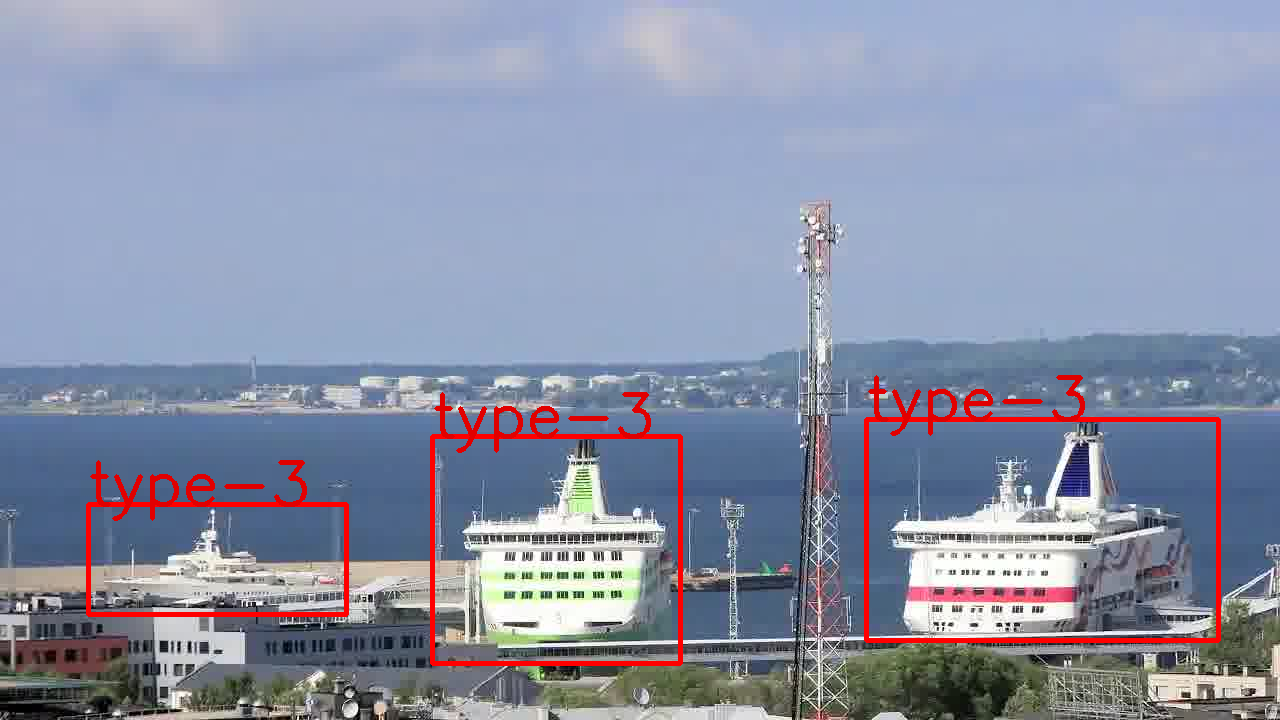

In [6]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img1.jpg', thresh=0.1, img_size=300,
                                            bbox_thickness=3, text_size=2, text_thickness=4);
from IPython.display import Image
Image(filename='output.png') 

Image loaded in 0.010205507278442383 sec
Predicted in 0.011307477951049805 sec
Inference printed on image in 0.02132701873779297 sec


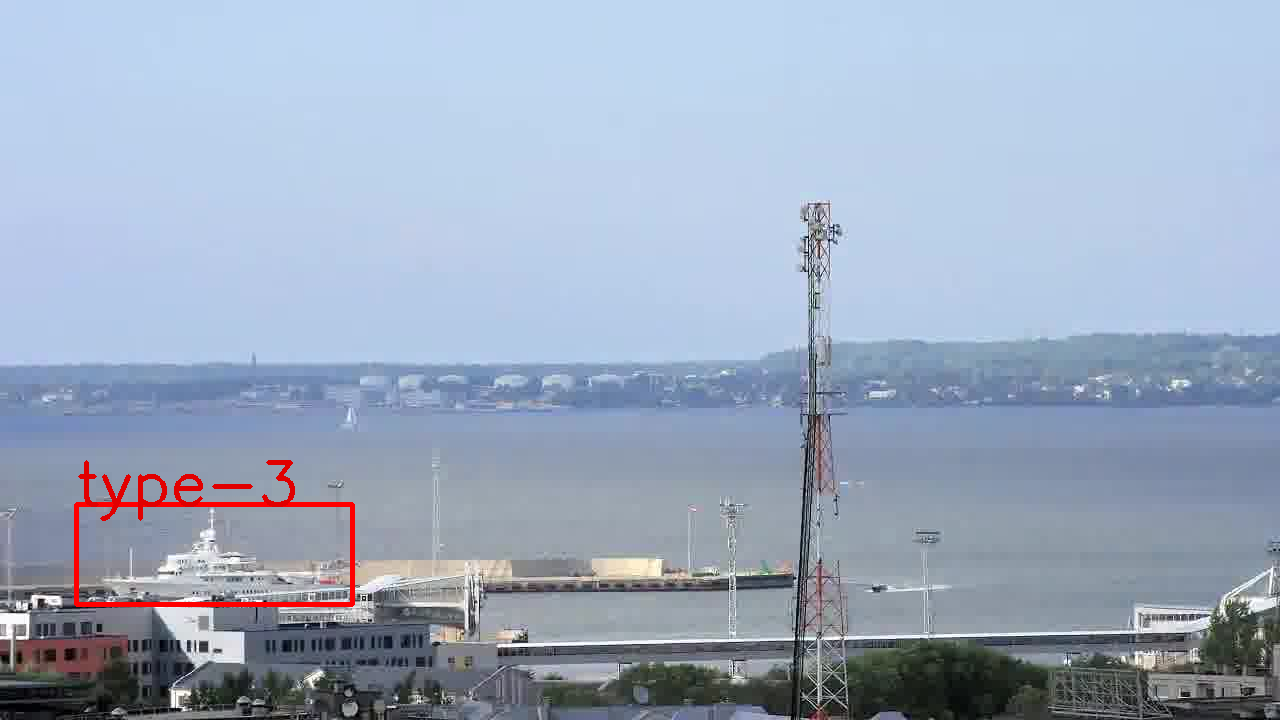

In [7]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img5.jpg', thresh=0.1, img_size=300,
                                            bbox_thickness=3, text_size=2, text_thickness=4);
from IPython.display import Image
Image(filename='output.png') 

In [5]:
gtf.benchmark_for_speed('ship/test/img1.jpg', img_size=300)

Average Image loading time: 0.00915919542312622
Average Inference time: 0.010321846008300781
Result extraction time: 0.08013244390487671
total_time = 1.0321846008300781
images_per_sec = 96
99th_percentile = 11.025428771972656
latency_mean  = 10.321846008300781
latency_median = 10.323405265808105
latency_min = 9.477376937866211


# Inference on TensorRT optimized model 

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/12_tf_obj_1/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [5]:
gtf.set_model_params('trt_fp16_dir/trt_graph.pb', "ship/classes.txt")

Instructions for updating:
Use tf.gfile.GFile.




In [6]:
ls ship/test

img1.jpg  img2.jpg  img3.jpg  img4.jpg  img5.jpg  img6.jpg


In [7]:
# Running for the first time builds the tensorRT engine for the model based on the plan saved in trt_fp16_dir folder

Image loaded in 0.011018753051757812 sec
Predicted in 0.004398345947265625 sec
Inference printed on image in 0.08016252517700195 sec


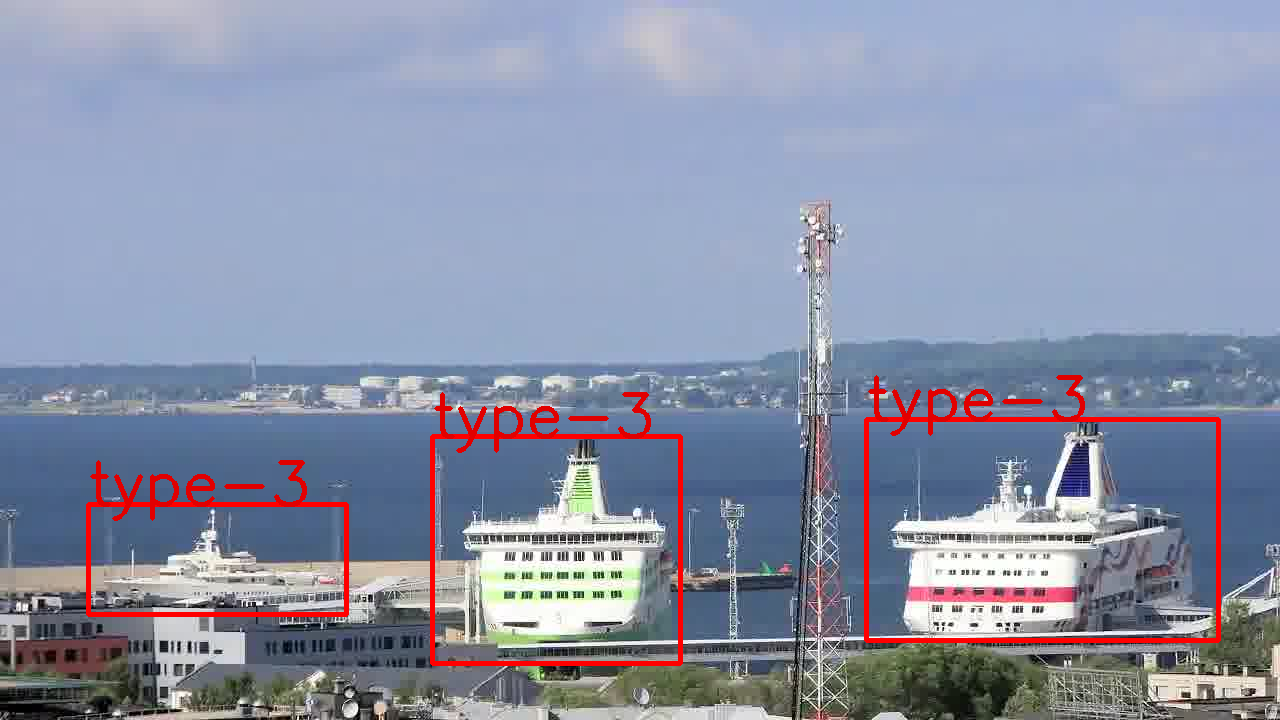

In [9]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img1.jpg', thresh=0.1, img_size=300);
from IPython.display import Image
Image(filename='output.png') 

Image loaded in 0.009109973907470703 sec
Predicted in 0.004350900650024414 sec
Inference printed on image in 0.02128291130065918 sec


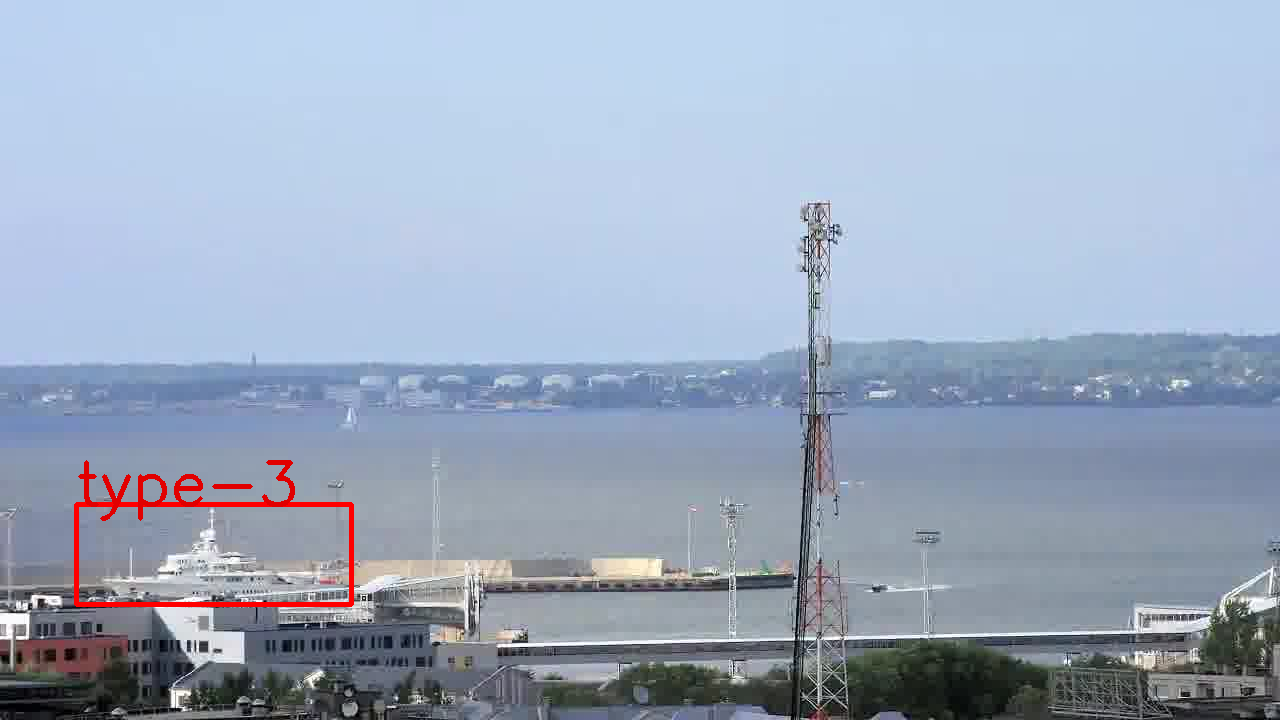

In [10]:
scores, bboxes, labels = gtf.infer_on_image('ship/test/img5.jpg', thresh=0.5, img_size=300);
from IPython.display import Image
Image(filename='output.png') 

In [11]:
gtf.benchmark_for_speed('ship/test/img1.jpg', img_size=300)

Average Image loading time: 0.009258718490600585
Average Inference time: 0.004241223335266113
Result extraction time: 0.0807196044921875
total_time = 0.42412233352661133
images_per_sec = 235
99th_percentile = 4.4536590576171875
latency_mean  = 4.241223335266113
latency_median = 4.2438507080078125
latency_min = 4.015684127807617


# Setup your Jetson Nano Board

 - Step 1: Download Jetpack 4.3 SD Card Image https://developer.nvidia.com/jetpack-43-archive
 
 - Step 2: Write this image on SD Card. You may use https://www.balena.io/etcher/
 
 - Step 3: Attach your SD Ccard to Nano board and boot the system, and complete the installation steps

# Install all the pre-requisite libraries

Run these commands in the terminal


### Update apt
 - sudo apt-get update
 - sudo apt-get upgrade


### Install nano writer
 - sudo apt-get install nano

 
### Install libraries required by OpenCV and Tensorflow
 - sudo apt-get install git cmake libatlas-base-dev gfortran libhdf5-serial-dev hdf5-tools nano locate libfreetype6-dev python3-setuptools protobuf-compiler libprotobuf-dev openssl libssl-dev libcurl4-openssl-dev cython3 libxml2-dev libxslt1-dev python3-pip
 - sudo apt-get install libopenblas-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev 


### Install python 3 pip 
 - sudo pip3 install virtualenv virtualenvwrapper


### Add the following file to .bashrc
 - export VIRTUALENVWRAPPER_PYTHON=/usr/bin/python3
 - export WORKON_HOME=$HOME/.virtualenvs
 - export VIRTUALENVWRAPPER_VIRTUALENV=/usr/local/bin/virtualenv
 - source /usr/local/bin/virtualenvwrapper.sh


### After adding run
 - source ~/.bashrc


### Install Cmake 
 - wget https://github.com/Kitware/CMake/releases/download/v3.18.1/cmake-3.18.1.tar.gz
 - tar -xvzf cmake-3.18.1.tar.gz
 - cd cmake-3.18.1 && cmake . && make -j3
 - sudo make install


### Install further libraries 
 - sudo apt install -y libjpeg-dev libpng-dev libtiff-dev libavcodec-dev libavformat-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev v4l-utils qv4l2 v4l2ucp libdc1394-22-dev libffi-dev libgtk-3-dev libatlas-base-dev gfortran


### Add to ~/.bashrc
 - export PATH=/usr/local/cuda-10.0/bin${PATH:+:${PATH}}
 
 - export LD_LIBRARY_PATH=/usr/local/cuda-10.0/lib64\
                         ${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}
 

### After adding run
 - source ~/.bashrc


### Create a Virtual-Environment
 - mkvirtualenv -p /usr/bin/python3.6 tf_test1


### Install all necessary python packages
 - pip install numpy==1.19.1
 - pip install scipy==1.5.1
 - pip install scikit-build protobuf cython -vvvv
 - pip install grpcio absl-py py-cpuinfo psutil portpicker six mock requests gast h5py astor termcolor protobuf keras-applications keras-preprocessing wrapt google-pasta -vvvv
 - pip install https://developer.download.nvidia.com/compute/redist/jp/v43/tensorflow-gpu/tensorflow_gpu-1.15.0+nv19.12-cp36-cp36m-linux_aarch64.whl -vvvv
 - pip install pandas pillow -vvvv


### Install OpenCV
 - mkdir opencv && cd opencv
 - wget -O opencv.zip https://github.com/opencv/opencv/archive/4.1.2.zip
 - unzip opencv.zip
 - mv opencv-4.1.2 opencv
 - cd opencv && mkdir build && cd build
 - cmake -D CMAKE_BUILD_TYPE=RELEASE -D WITH_CUDA=OFF -D WITH_CUBLAS=OFF -D WITH_LIBV4L=ON -D BUILD_opencv_python3=ON -D BUILD_opencv_python2=OFF -D BUILD_opencv_java=OFF -D WITH_GSTREAMER=ON -D WITH_GTK=ON -D BUILD_TESTS=OFF -D BUILD_PERF_TESTS=OFF -D BUILD_EXAMPLES=OFF -D OPENCV_ENABLE_NONFREE=OFF ..
 - make -j3
 - sudo make install
 - cd ~/.virtualenvs/tf_test1/lib/python3.6/site-packages
 - ln -s /usr/local/lib/python3.6/site-packages/cv2/python-3.6/cv2.cpython-36m-aarch64-linux-gnu.so cv2.so


### Clone and install Monk_Object Detection library
 - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
 - cd Monk_Object_Detection/12_tf_obj_1/installation/
 - cd Monk_Object_Detection/12_tf_obj_1/installation
 - chmod +x install_nano.sh && ./install_nano.sh


In [ ]:
# Copy Sample dataset 

In [ ]:
! cp -r Monk_Object_Detection/example_notebooks/sample_dataset/ship .

# Inference on Nano board (To Run only on Jetson Nano Board)

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/12_tf_obj_1/lib/")

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
# Model loading takes time on nano boards

In [ ]:
gtf.set_model_params('trt_fp16_dir/trt_graph.pb', "ship/classes.txt")

In [ ]:
ls ship/test

In [ ]:
# Running for the first time builds the tensorRT engine for the model based on the plan saved in trt_fp16_dir folder

In [ ]:
# Oputput will be saved as output.png
scores, bboxes, labels = gtf.infer_on_image('ship/test/img5.jpg', thresh=0.5, img_size=300);

In [ ]:
# Run speed benchmark

In [ ]:
gtf.benchmark_for_speed('ship/test/img1.jpg', img_size=300)

In [ ]:
# Get all pretrained weights from here

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gtBp6G4Gix-b9epmUzd5kQtT1aY-iwXk' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1gtBp6G4Gix-b9epmUzd5kQtT1aY-iwXk" -O tf2_jetson_nano.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq tf2_jetson_nano.zip